In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
  return 3*x**2 - 4*x + 5

In [4]:
f(3.)

20.0

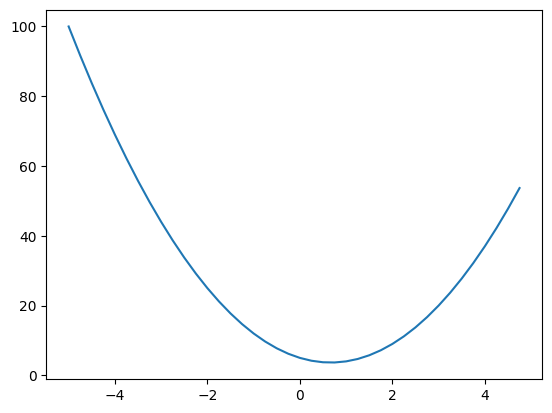

In [9]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [7]:
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [164]:
import math

class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    # Stores the gradient
    self.grad = 0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    return out
  
  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out
  
  def __neg__(self):
    return self * -1
  
  def __sub__(self, other):
    return self + (-other)
  
  def __rmul__(self, other):
    return self * other
  
  def __radd__(self, other):
    return self + other
  
  def __truediv__(self, other):
    return self * (other ** -1)
  
  def exp(self):
    x = self.data
    v = math.exp(x)
    out = Value(v, (self,), 'exp')
    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only support int/float powers for now"
    out = Value(self.data ** other, (self,), f'**{other}')
    def _backward():
      self.grad += out.grad * other * (self.data ** (other - 1))
    out._backward = _backward
    return out


  
  def tanh(self):
    x = self.data
    t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
    out = Value(t, (self,), 'tanh')
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    return out
  
  def backward(self):
    topo = []
    visited = set()
    def build_topo(node):
      if node not in visited:
        visited.add(node)
        for child in node._prev:
          build_topo(child)
        topo.append(node)
    build_topo(self)
    self.grad = 1.0
    print(topo)
    for node in reversed(topo):
      node._backward()

  
  def __repr__(self) -> str:
    return f"Value({self.data=})"

In [148]:
a = Value(2.0)
b = Value(3)
a - b

self.data=-1.0

In [93]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'


In [73]:
%pwd

'/Users/ahmad/work/mygrad'

In [94]:
from graphviz import Digraph

def trace(node):
  nodes, edges = set(), set()
  def visit(node):
    if node in nodes:
      return
    nodes.add(node)
    for child in node._prev:
      edges.add((child, node))
      visit(child)
  visit(node)
  print(nodes, edges)
  return nodes, edges
    
def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
  nodes, edges = trace(root)
  for node in nodes:
    uid = str(id(node))
    dot.node(name=uid, label="{%s | data %.4f | grad %.4f}" % (node.label, node.data,node.grad),shape='record')
    if node._op:
      dot.node(name=uid + node._op, label=node._op)
      dot.edge(uid + node._op, uid)
  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)
  return dot
  

    

{self.data=10.0, self.data=2.0, self.data=-2.0, self.data=-3.0, self.data=-6.0, self.data=4.0, self.data=-8.0} {(self.data=-6.0, self.data=4.0), (self.data=-2.0, self.data=-8.0), (self.data=10.0, self.data=4.0), (self.data=2.0, self.data=-6.0), (self.data=-3.0, self.data=-6.0), (self.data=4.0, self.data=-8.0)}


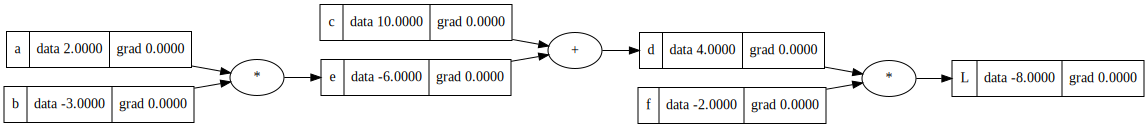

In [95]:
draw_dot(L)

In [77]:
L.grad = 1
f.grad = 4.0
d.grad = -2
c.grad = -2
e.grad = -2

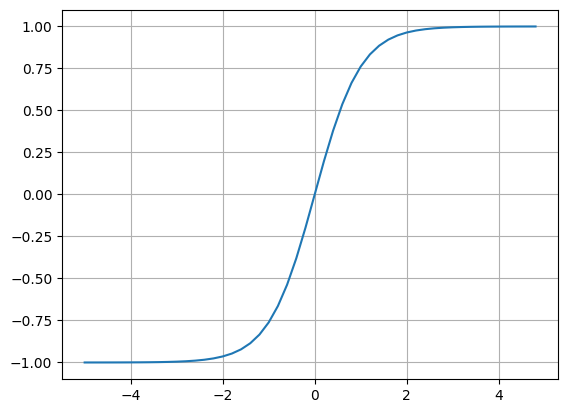

In [78]:
import numpy as np
import matplotlib.pyplot as plt
xs = np.arange(-5,5,0.2)
ys = (np.tanh(xs))
plt.plot(xs, ys)
plt.grid()

AHMAD
setbackward
[self.data=6.881373, self.data=0.0, self.data=1.0, self.data=0.0, self.data=-3.0, self.data=2.0, self.data=-6.0, self.data=-6.0, self.data=0.881373, self.data=0.7071064876766542]
AHMAD here
in tanh: self.grad=0.5000004150855857
{self.data=0.0, self.data=-3.0, self.data=-6.0, self.data=1.0, self.data=-6.0, self.data=6.881373, self.data=2.0, self.data=0.881373, self.data=0.0, self.data=0.7071064876766542} {(self.data=1.0, self.data=0.0), (self.data=-6.0, self.data=0.881373), (self.data=6.881373, self.data=0.881373), (self.data=-3.0, self.data=-6.0), (self.data=2.0, self.data=-6.0), (self.data=0.881373, self.data=0.7071064876766542), (self.data=-6.0, self.data=-6.0), (self.data=0.0, self.data=-6.0), (self.data=0.0, self.data=0.0)}


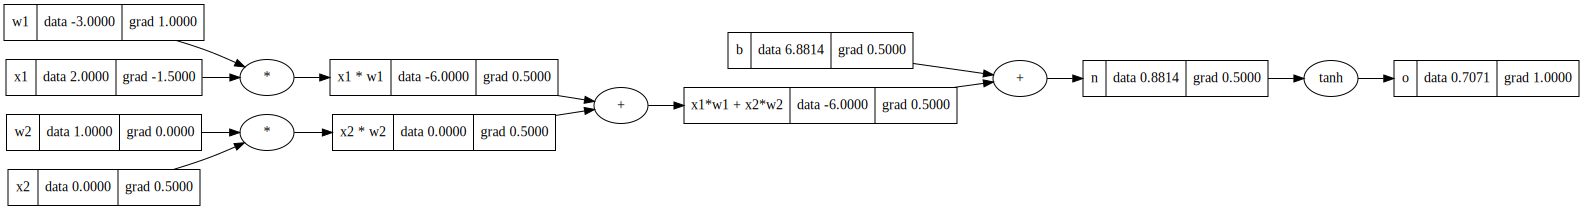

In [138]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.881373, label='b')

x1w1 = x1 * w1; x1w1.label = 'x1 * w1'
x2w2 = x2 * w2; x2w2.label = 'x2 * w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

o.backward()




draw_dot(o)

[self.data=1, self.data=1.0, self.data=0.0, self.data=0.0, self.data=-3.0, self.data=2.0, self.data=-6.0, self.data=-6.0, self.data=6.881373, self.data=0.881373, self.data=2, self.data=1.762746, self.data=5.828420281948952, self.data=6.828420281948952, self.data=0.14644675616167294, self.data=-1, self.data=4.828420281948952, self.data=0.7071064876766542]
{self.data=0.881373, self.data=4.828420281948952, self.data=1, self.data=-6.0, self.data=-1, self.data=6.828420281948952, self.data=-6.0, self.data=2.0, self.data=0.14644675616167294, self.data=1.762746, self.data=6.881373, self.data=0.7071064876766542, self.data=-3.0, self.data=1.0, self.data=5.828420281948952, self.data=2, self.data=0.0, self.data=0.0} {(self.data=-6.0, self.data=0.881373), (self.data=1.762746, self.data=5.828420281948952), (self.data=2.0, self.data=-6.0), (self.data=0.0, self.data=0.0), (self.data=-1, self.data=4.828420281948952), (self.data=0.0, self.data=-6.0), (self.data=1.0, self.data=0.0), (self.data=-3.0, self

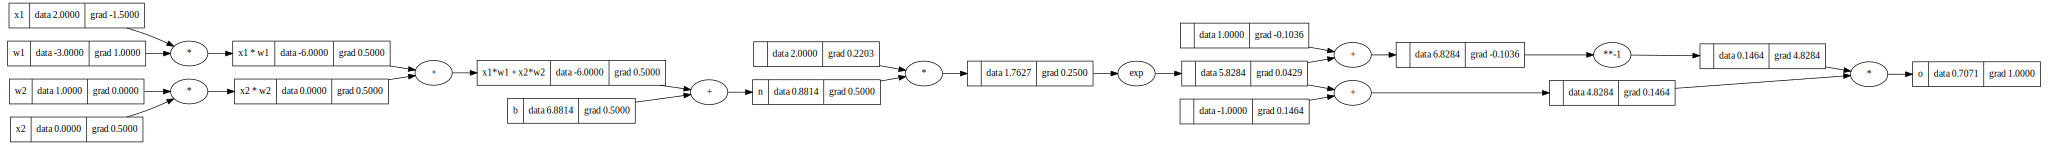

In [154]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.881373, label='b')

x1w1 = x1 * w1; x1w1.label = 'x1 * w1'
x2w2 = x2 * w2; x2w2.label = 'x2 * w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1); o.label = 'o'

o.backward()




draw_dot(o)

In [ ]:
# doing manual backpropagation

o.grad = 1
n.grad = o.data ** 2
x1w1x2w2.grad = n.grad * 1
b.grad = n.grad * 1
x1w1.grad = x1w1x2w2.grad * 1
x2w2.grad = x1w1x2w2.grad * 1
x2.grad = w2.data * x2w2.grad
x1.grad = w1.data * x1w1.grad


In [159]:
import torch

x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.88137]).double(); b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()
print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())


0.7071050214706146
---
x2 0.5000024886110417
w2 0.0
x1 -1.500007465833125
w1 1.0000049772220834


In [160]:
o

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [183]:
import random

class Neuron:
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1, 1))

  def __call__(self, x):
    act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out
  
class Layer:
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
class MLP:
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i + 1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x


x = [2.0, 3.0]
n = Neuron(2)
n(x)

l = Layer(2,3)
l(x)

x = [2.0, 3.0, -1.0]
n = MLP(3, [4,4,1])
n(x)

Value(self.data=0.6096209363530707)

{Value(self.data=2.0), Value(self.data=0.9959109146630472), Value(self.data=0.7503704484504706), Value(self.data=0.08279597337371569), Value(self.data=3.0952672564475), Value(self.data=1.471777955928552), Value(self.data=-0.09088372124895293), Value(self.data=-0.008087747875237236), Value(self.data=-0.008087571535497681), Value(self.data=-1.0), Value(self.data=0.701436331780817), Value(self.data=1.0953866103089445), Value(self.data=2.1945136949879727), Value(self.data=-0.18685525049063595), Value(self.data=0.9085313598183085), Value(self.data=3.0), Value(self.data=3.0), Value(self.data=0.10817087216725199), Value(self.data=0.9007535614595272), Value(self.data=1.0167022319855605), Value(self.data=-0.04313551316374864), Value(self.data=-0.45528424522355637), Value(self.data=0.9735667188218119), Value(self.data=0.7502674716472083), Value(self.data=0.3260048736527505), Value(self.data=0.8031316283371612), Value(self.data=-1.0627423695582403), Value(self.data=0.14323054133513588), Value(sel

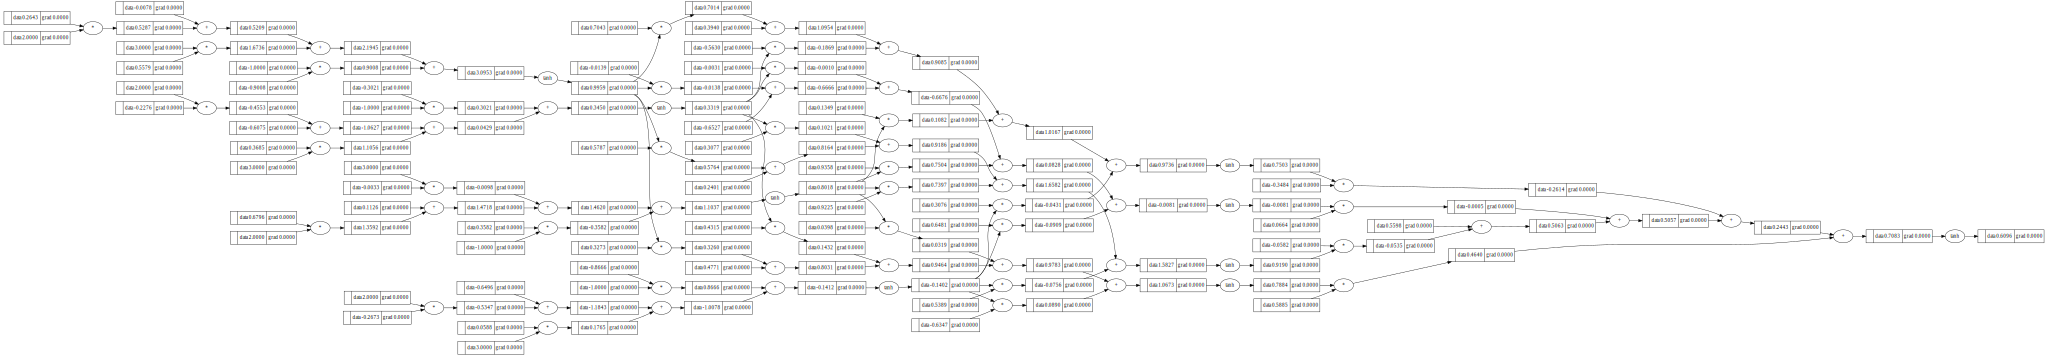

In [184]:
draw_dot(n(x))